## Observations and Insights 

Pymaceuticals specializes in anti-cancer pharmaceuticals.  In its most recent efforts, it began screening for potential
treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.  In this study, 248 mice identified
with SCC tumor growth were treated through a variety of drug regimens.  Over the course of 45 days, tumor development was
observed and measured.  The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin,
versus the other treatment regimens.  We have been tasked by the executive team to generate all of the tables and figures
needed for the technical report of the study.  The executive team also has asked for a top-level summary of the study results.

Given the provided data, some conclusions we could draw would be:
    
1.  Over a 45 day regimen with Capomulin, the interquartile range of the average tumor volume was considerably lower than subjects treated with the other drugs used in our study.  This smaller range of variability could suggest that results are easier to consistently predict and forecast under treatment regimens of Capomulin.
2.  The strongest impact of Capomulin seems to occur within the first 40 days of treatment.  After that, its rate of effectiveness slows and actually reversed course in some subjects.
3.  The average tumor volume is strongly correlated to the weight of the subject studied (0.84 correlation coefficient).  This
would make logical sense as we would expect abnormal biological growths to be proportionate with body size across all subjects.

Overall, we feel the study definitely provided some insights into the comparison of treatment drug regimens.  This study could be further expanded upon to uncover deeper details, and our high level analysis should help to define further and more-detailed studies to drive objective decisions to advance the program to the next level.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_of_mice = len(complete_df["Mouse ID"].unique())
print(number_of_mice)

249


In [3]:
# Getting the duplicate mouse by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = complete_df.loc[complete_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = complete_df[complete_df["Mouse ID"] != "g989"]
# cleaned_df.head()

In [5]:
# Checking the number of mice in the clean DataFrame.
unique_mice = len(cleaned_df["Mouse ID"].unique())
unique_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_group_df = cleaned_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = regimen_group_df["Tumor Volume (mm3)"].mean()
tumor_median = regimen_group_df["Tumor Volume (mm3)"].median()
tumor_variance = regimen_group_df["Tumor Volume (mm3)"].var()
tumor_std_dev = regimen_group_df["Tumor Volume (mm3)"].std()
tumor_std_err = regimen_group_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_summary_1_df = pd.DataFrame({"Tumor Volume (mm3) Mean":(tumor_mean),
                                   "Tumor Volume (mm3) Median":(tumor_median),
                                   "Tumor Volume (mm3) Variance":(tumor_variance),
                                   "Tumor Volume (mm3) Standard Deviation":(tumor_std_dev),
                                   "Tumor Volume (mm3) Standard Error of Mean":(tumor_std_err)})
regimen_summary_1_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line [of code]
regimen_summary_2_df = pd.DataFrame(cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"]))
regimen_summary_2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

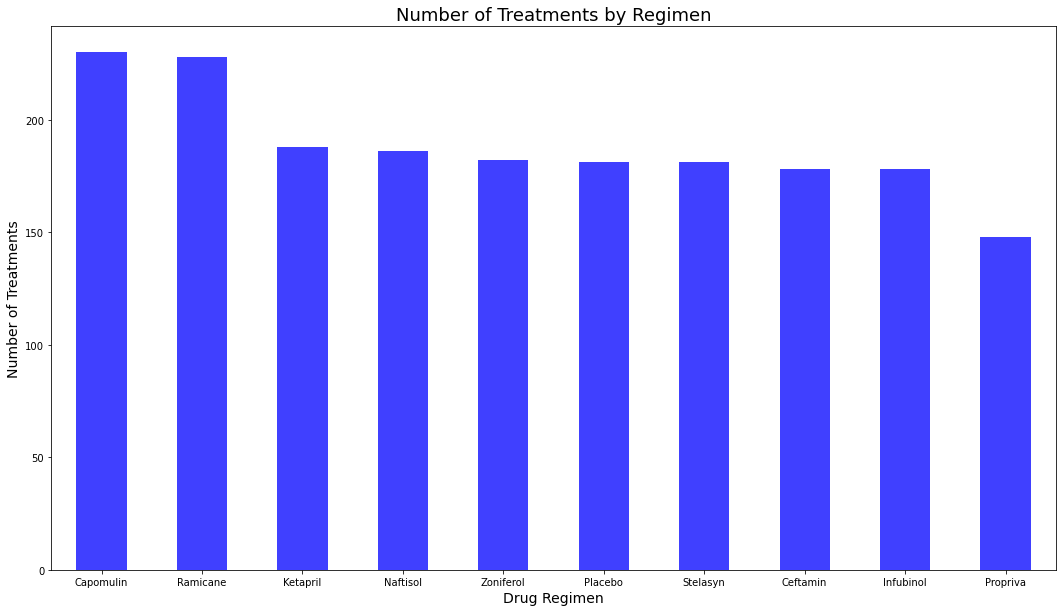

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Create groupby objects by drug regimen and mouse ID
pandas_bar_df = cleaned_df["Drug Regimen"].value_counts()

# Define bar plot size, color and transparency, legend, and x tickmark orientation
pandas_bar_chart = pandas_bar_df.plot(kind = "bar", figsize = (18,10), color = "b", alpha = 0.75, legend = False, rot = 0)

# Define bar plot title, x label, and y label (and their font sizes)
pandas_bar_chart.set_title("Number of Treatments by Regimen", fontsize = 18)
pandas_bar_chart.set_xlabel("Drug Regimen", fontsize = 14)
pandas_bar_chart.set_ylabel("Number of Treatments", fontsize = 14)

# Print pandas bar plot to image file
plt.savefig("../Images/PandasBarPlot.jpg")

plt.show()

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Define bar plot size
plt.figure(figsize = (18,10))

# Pass values into bar plot, and define color and transparency
plt.bar(pandas_bar_df.index.values, pandas_bar_df.values, color = "b", alpha = 0.75)

# Define bar plot title, x label, and y label (and their font sizes)
plt.title("Number of Treatments per Regimen", fontsize = 18)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Treatments", fontsize = 14)

# Print pyplot bar plot to image file
plt.savefig("../Images/PyPlotBarPlot.jpg")

plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create groupby object by mouse ID and gender
mouse_gender_df = cleaned_df["Sex"].value_counts()

# Rename DataFrame column
mouse_gender_df.columns = ["Number of Mice"]

# Define pie plot, y value by number of mice, percentages, plot size, start angle, legend, colors, explode amount, and shadow 
pandas_pie_chart = mouse_gender_df.plot(kind = "pie", y = "Number of Mice",
                                        autopct = "%1.1f%%", figsize = (16,16), startangle = 135, legend = False,
                                        colors = ("blue", "pink"), explode = (0.07, 0), shadow = True)

# Define pie plot title and y label (and their font sizes)
pandas_pie_chart.set_title("Distribution of Mice by Gender", fontsize = 18)
pandas_pie_chart.set_ylabel("Gender", fontsize = 14)

# Print pandas pie plot to image file
plt.savefig("../Images/PandasPiePlot.jpg")

plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Define pie plot colors and slice explode amount
colors = ["blue", "pink"]
explode = (0.07, 0)

# Define pie plot size
plt.figure(figsize = (16,16))

# Pass values, labels, colors, and explode into pie plot; define percentages format, start angle, and shadow
plt.pie(mouse_gender_df.values, labels = mouse_gender_df.index.values, colors = colors, explode = explode,
        autopct="%1.1f%%", startangle = 135, shadow = True)

# Define pie plot title and y label (and their font sizes)
plt.title("Distribution of Mice by Gender", fontsize = 18)
plt.ylabel("Gender", fontsize = 14)

# Print pyplot pie plot to image file
plt.savefig("../Images/PyPlotPiePlot.jpg")

plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = pd.DataFrame(cleaned_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint":"Last Timepoint"})                                                                                                                                  
                                                                                                                                    
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(cleaned_df, greatest_timepoint_df, how = "outer", on = "Mouse ID")

# Drop the row containing NaN data
tumor_volume_df.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = True)

tumor_volume_df

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for x in regimen_names:
    volumes_df = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == x]
    
    # Create new DataFrame by adding subset to previous DataFrame
    greatest_volumes_df = volumes_df.loc[volumes_df["Timepoint"] == volumes_df["Last Timepoint"]]

    # Append list with tumor volumes on the last timepoints
    tumors = greatest_volumes_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumors)

    # Calculate the IQR and quartiles 
    quartiles = tumors.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    medianq = quartiles[0.50]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
  
    # Print results to the display
    print(f"The lower quartile of {x} is:  {lowerq}.")
    print(f"The median of {x} is:  {medianq}.")
    print(f"The upper quartile of {x} is:  {upperq}.")
    print(f"The interquartile range of {x} is:  {iqr}.")
    
    # Quantively determine outliers using upper and lower bounds and print to the display
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("*************************************************************")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = dict(marker = "o", markerfacecolor = "red", markersize = 10, markeredgecolor = "black")

# Define box plot size
plt.figure(figsize = (18,16))

# Define box plot values and outlier
plt.boxplot(tumor_vol_data, labels = regimen_names, flierprops = outlier)

# Define box plot title, y label, x label, and x tick labels
plt.title("Range of Final Tumor Volumes by Drug Regimen", fontsize = 18)
plt.ylabel("Tumor Volumes (mm3)", fontsize = 14)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.xticks(fontsize = 14)

# Print box plot to image file
plt.savefig("../Images/BoxPlot.jpg")

plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Filter all by Capomulin group to select a mouse to create line
capomulin_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin")]

# Line used to select a mouse at random
# random_mouse_df = capomulin_df.sample(1)
# random_mouse_df

# Create new DataFrame for selected mouse
selected_mouse_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "w914", :].reset_index(drop = True)

# Retrieve timepoint and tumor volume data
timepoints = selected_mouse_df["Timepoint"]
volumes = selected_mouse_df["Tumor Volume (mm3)"]

# Define line plot size
plt.figure(figsize = (18,10))

# Plot x and y values on line plot
plt.plot(timepoints, volumes)

# Define line plot title, x and y labels (and their font sizes), and x and y limits
plt.title("Capomulin:  Tumor Volume over Time for Mouse w914", fontsize = 18)
plt.xlabel("Timeline (in days)", fontsize = 14)
plt.ylabel("Tumor Volume (mm3)", fontsize = 14)
plt.xlim(0, max(timepoints))
plt.ylim(34, max(volumes) * 1.01)

plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for all mice in the Capomulin regimen

# Create groupby object to gather values and calculate means based on mouse ID
capomulin_avg = capomulin_df.groupby("Mouse ID").mean()

# Retrieve mean values of weight and tumor volume
weights = capomulin_avg["Weight (g)"]
avg_volumes = capomulin_avg["Tumor Volume (mm3)"]

# Define scatter plot size
plt.figure(figsize = (18,10))

# Plot x and y values on scatter plot
plt.scatter(weights, avg_volumes)

# Define scatter plot title, and x and y labels (and their font sizes)
plt.title("Capomulin:  Average Tumor Volumes by Weights of Mice", fontsize = 18)
plt.xlabel("Weight (in grams)", fontsize = 14)
plt.ylabel("Average Tumor Volumes (mm3)", fontsize = 14)

plt.show()

## Correlation and Regression

In [ ]:
# Calculate and print the correlation coefficient between weight and average tumor volume
print(f"The correlation coefficient between subject weight and average tumor volume is {round(st.pearsonr(weights,avg_volumes)[0],2)}")

In [ ]:
# Perform a linear regression on weights versus average tumor volumes
capo_slope, capo_int, capo_r, capo_p, capo_std_err = st.linregress(weights, avg_volumes)

# Create equation of line to calculate predicted average tumor volume
capo_fit = capo_slope * weights + capo_int

# Create equation in string formats to print on scatter plot
equation = "y = " + str(round(capo_slope, 2)) + "x + " + str(round(capo_int, 2))

# Create groupby object to gather values and calculate means based on mouse ID
capomulin_avg = capomulin_df.groupby("Mouse ID").mean()

# Retrieve mean values of weight and tumor volume
weights = capomulin_avg["Weight (g)"]
avg_volumes = capomulin_avg["Tumor Volume (mm3)"]

# Define scatter plot size
plt.figure(figsize = (18,10))

# Plot x and y values on scatter plot
plt.scatter(weights, avg_volumes)

# Plot linear regression line on scatter plot
plt.plot(weights, capo_fit, "--", color = "red")

# Define linear regression line and print on scatter plot
plt.annotate(equation, (23.5, 42), fontsize = 14, color = "red")

# Define scatter plot title, and x and y labels (and their font sizes)
plt.title("Capomulin:  Average Tumor Volumes by Weights of Mice (with linear regression model)", fontsize = 18)
plt.xlabel("Weight (in grams)", fontsize = 14)
plt.ylabel("Average Tumor Volumes (mm3)", fontsize = 14)

plt.show()